# This Program will Predict Tesla Stock Price using the XGBoost algorithm

__Objectives:__
1. Collecting and Cleaning the Tesla Stock Data
2.  Use XGBoost algorithm to predict Tesla Stock Price
3.  Evaluate the XGBoost model

## 1. Collecting and cleaning the Tesla Stock Data




To collect the Tesla Stock Data, we will be using Yahoo Finance to obtain Tesla Stock Data.

__This command will download and install the yfinance library and its dependencies.__

In [6]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


__Here we are importing the necessary libraries__

In [8]:
import yfinance as yf
import pandas as pd

__Here we are setting the period to max to obtain as much historical data as possible__

In [10]:
Tesla = yf.Ticker("TSLA") # creating a ticker object for Tesla
Tesla_share_price_data = Tesla.history(period="max")
Tesla_share_price_data.reset_index(inplace=True)

__Here we are getting the first 5 rows of the Tesla Stock data__

In [12]:
Tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


__This tells us that the Tesla_share_price_data is a dataframe__

In [14]:
type(Tesla_share_price_data)

pandas.core.frame.DataFrame

__Here we will drop the rows that contain any null values. This is part of the data cleaning process__

In [16]:
Tesla_share_price_data.dropna()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3548,2024-08-05 00:00:00-04:00,185.220001,203.880005,182.000000,198.880005,100308800,0.0,0.0
3549,2024-08-06 00:00:00-04:00,200.750000,202.899994,192.669998,200.639999,73783900,0.0,0.0
3550,2024-08-07 00:00:00-04:00,200.770004,203.490005,191.479996,191.759995,71159800,0.0,0.0
3551,2024-08-08 00:00:00-04:00,195.699997,200.699997,192.039993,198.839996,65033900,0.0,0.0


__In order to predict the Tesla Stock Price, we will need the date column and we will use the close column. We will plot the current Tesla Stock Price Graph using MatPlotLib__

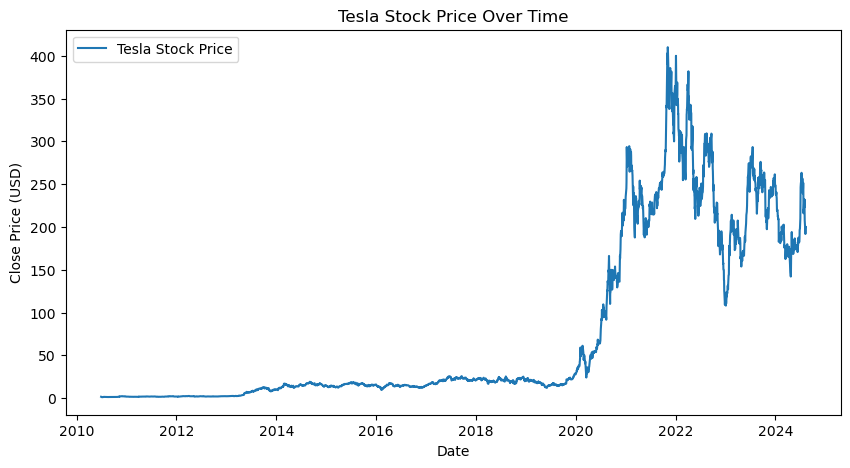

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the DataFrame slice
Tesla_Stock_Data = Tesla_share_price_data[['Date', 'Close']].copy()

# Convert 'Date' to datetime
Tesla_Stock_Data['Date'] = pd.to_datetime(Tesla_Stock_Data['Date'])

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(Tesla_Stock_Data['Date'], Tesla_Stock_Data['Close'], label='Tesla Stock Price')

# Adding title and labels
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()

# Display the plot
plt.show()

## 2. Using XGBoost Algorithm to predict Stock Price

__We will create a target column that represents the closing price for the next day. This target column will serve as the output variable, which we will use to compare against the predictions made by our model.__

In [21]:
Tesla_Stock_Data['Target'] = Tesla_Stock_Data['Close'].shift(-1)
Tesla_Stock_Data.head()

,Date,Close,Target
0,2010-06-29 00:00:00-04:00,1.592667,1.588667
1,2010-06-30 00:00:00-04:00,1.588667,1.464000
2,2010-07-01 00:00:00-04:00,1.464000,1.280000
3,2010-07-02 00:00:00-04:00,1.280000,1.074000
4,2010-07-06 00:00:00-04:00,1.074000,1.053333


__Get the last 5 rows__

In [23]:
Tesla_Stock_Data.tail()

,Date,Close,Target
3548,2024-08-05 00:00:00-04:00,198.880005,200.639999
3549,2024-08-06 00:00:00-04:00,200.639999,191.759995
3550,2024-08-07 00:00:00-04:00,191.759995,198.839996
3551,2024-08-08 00:00:00-04:00,198.839996,200.000000
3552,2024-08-09 00:00:00-04:00,200.000000,NaN


__Here since we have a null value, we will need to get rid of that row.__ 

In [25]:
Tesla_Stock_Data.dropna(inplace = True) # drop null values so that it doesn't affect our model
Tesla_Stock_Data.tail()

,Date,Close,Target
3547,2024-08-02 00:00:00-04:00,207.669998,198.880005
3548,2024-08-05 00:00:00-04:00,198.880005,200.639999
3549,2024-08-06 00:00:00-04:00,200.639999,191.759995
3550,2024-08-07 00:00:00-04:00,191.759995,198.839996
3551,2024-08-08 00:00:00-04:00,198.839996,200.000000


In [26]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


__Importing the necessary libraries for the XGBoost algorithm__

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Creating a function for training and testing the data__

In [30]:
# Define the train_test function
def train_test(dataset, ratio):
    split_data = int(len(dataset) * (1 - ratio))
    return dataset[:split_data], dataset[split_data:]

## GridSearchCV

__Here we will be using GridSearchCV to find the best hypeparameters for our XGBoost model. We will define a parameter grid and show the values that each parameter can take. GridSearchCV will help us find the best combination of parameters for our model.__ 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
# Hyperparameter tuning function
def tune_hyperparameters(X, Y):
    # Define the parameter grid for GridSearchCV
    param_grid = {
        "n_estimators": [900, 1000, 1100],
        "learning_rate": [0.040, 0.045, 0.050]
    }

    # Initialize GridSearchCV
    search = GridSearchCV(XGBRegressor(objective="reg:squarederror"), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    search.fit(X, Y)
    print("Best hyperparameters found: ", search.best_params_) # this tells us the best hyperparameters found
    return search.best_params_ # returns the best hyperparameters so that it can be used within other parts of the code


In [35]:
# Define the predict function with pre-tuned hyperparameters
def predict(train, value, best_params):
    train = np.array(train)
    X = train[:, :-1]  # Feature columns
    Y = train[:, -1]   # Target column
    
    # Use the best hyperparameters to fit the model
    best_model = XGBRegressor(objective="reg:squarederror", 
                              n_estimators=best_params['n_estimators'], 
                              learning_rate=best_params['learning_rate'])
    best_model.fit(X, Y)

    value = np.array(value).reshape(1, -1)
    prediction = best_model.predict(value)
    return prediction[0]

## Evaluating the XGBoost model

__We will be using the root mean square error to evaluate our model. This will tell us the level of error between the models' predicted values and the actual values.__

In [38]:
# Define the validation function

def validate(dataset, ratio, best_params):
    predictions = []
    train, test = train_test(dataset, ratio)

    history = [x for x in train]

    for i in range(len(test)):
        test_X, test_Y = test[i, :-1], test[i, -1]
        prediction = predict(history, test_X, best_params)
        predictions.append(prediction)
        history.append(test[i])

    error = mean_squared_error(test[:, -1], predictions, squared=False)  # squared=False means we are finding the RMSE
    return error, test[:, -1], predictions

__Here we are dropping the date column to make the model easier to work with. We will also be calling methods from above to fine-tune our hyperparameters and also to validate our model by finding out what the root mean square error is.__

In [40]:
 if 'Date' in Tesla_Stock_Data.columns:
    Tesla_Stock_Data = Tesla_Stock_Data.drop(['Date'], axis=1) # drop the date column 

# Perform train-test split
print("Performing train-test split")
train, test = train_test_split(Tesla_Stock_Data, test_size=0.2, random_state=42)
X_train, Y_train = train.iloc[:, :-1], train.iloc[:, -1]  # Updated with .iloc

# Tune hyperparameters on the entire training set
print("Tuning hyperparameters on the training set")
best_params = tune_hyperparameters(X_train, Y_train) # call method

# Convert the DataFrame to a NumPy array for validation
Tesla_Stock_Data_np = Tesla_Stock_Data.values

# Train and validate the model using the best hyperparameters
print("Validating the model")
rmse, y_true, y_pred = validate(Tesla_Stock_Data_np, 0.2, best_params) # calling the validate method

print(f"RMSE on the test set: {rmse}")

Performing train-test split
Tuning hyperparameters on the training set
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparameters found:  {'learning_rate': 0.04, 'n_estimators': 900}
Validating the model
RMSE on the test set: 13.094307846818952


C:\Users\rusha\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Plotting the graph

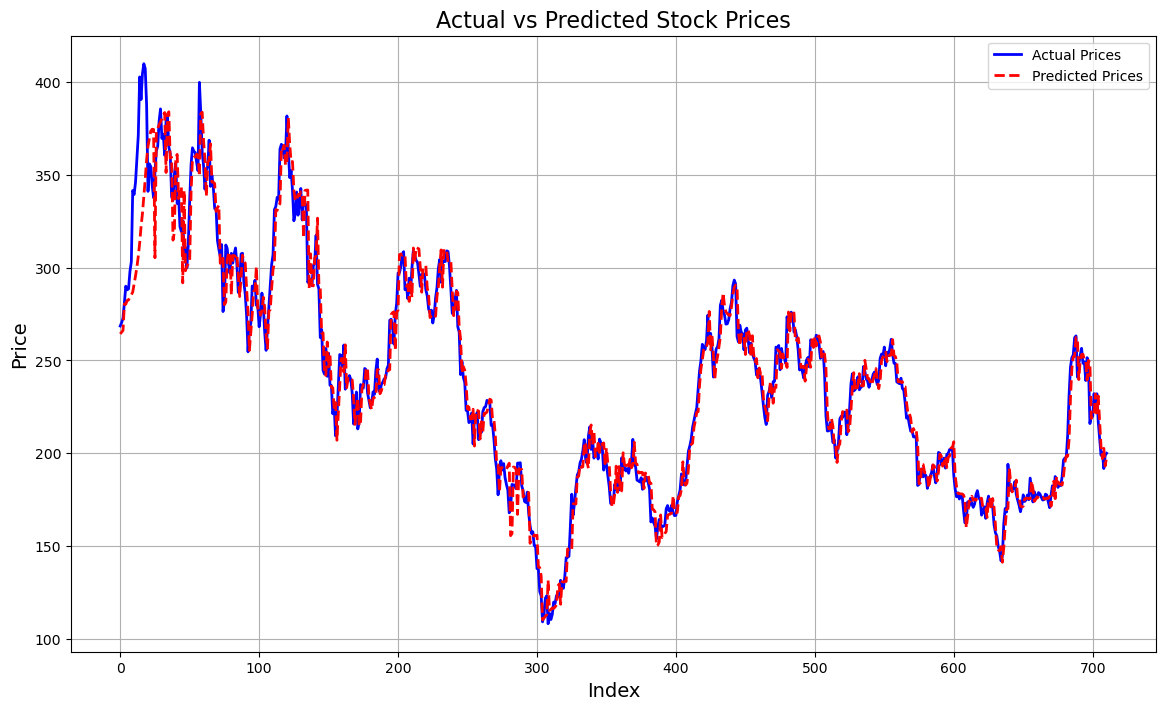

In [42]:
# Plot the actual vs predicted prices
plt.figure(figsize=(14, 8))
plt.plot(y_true, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='dashed', linewidth=2)
plt.title('Actual vs Predicted Stock Prices', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()